### Relevante pakker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [2]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [3]:
# fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Set_Name', 'Theme', 'Pieces', 'Price', 'Pages', 'Minifigures', 'Unique_Pieces']]

# fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df2['Price'] = df2['Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df2['Price'] = df2['Price'].astype(float)

df2

,Set_Name,Theme,Pieces,Price,Pages,Minifigures,Unique_Pieces
13,Stephanie's Summer Heart Box,Friends,95.0,7.99,40.0,1.0,52.0
16,Woody & RC,Disney,69.0,9.99,28.0,1.0,36.0
17,Mia's Summer Heart Box,Friends,85.0,7.99,36.0,1.0,41.0
18,Olivia's Summer Heart Box,Friends,93.0,7.99,40.0,2.0,48.0
19,Police Patrol Car,City,92.0,9.99,36.0,1.0,52.0
...,...,...,...,...,...,...,...
1171,1989 Batmobile,Batman,3306.0,249.99,404.0,3.0,484.0
1172,Tree House,Ideas,3036.0,199.99,428.0,4.0,482.0
1173,Welcome to Apocalypseburg!,THE LEGO MOVIE 2,3178.0,299.99,452.0,13.0,692.0
1174,Jurassic Park: T. rex Rampage,Jurassic World,3120.0,249.99,464.0,6.0,525.0


### Preprosessere dataene

In [4]:
# Gruppere temaene i nye grupper

df2['Generation'] = np.where(df2['Theme'].isin(['City', 'Star Wars', 'NINJAGO', 'DUPLO', 'Harry Potter', 'Creator 3-in-1',
                                                'Classic', 'Minifigures']), 'Our',
                    np.where(df2['Theme'].isin(['Friends', 'THE LEGO MOVIE 2', 'Minecraft', 'Hidden Side', 'Unikitty',
                                                'Jurassic World', 'Speed Champions', 'Juniors', 'Monkie Kid',
                                                'Trolls World Tour', 'Overwatch', 'LEGO Frozen 2', 'Powerpuff Girls',
                                                'Minions', 'Stranger Things']), 'After', 'Unsure'))
df2.groupby(['Generation']).size().reset_index(name = 'Count')

,Generation,Count
0,After,249
1,Our,338
2,Unsure,127


In [5]:
# Tabell med de nye gruppene

df2.groupby(['Generation', 'Theme']).size().reset_index(name = 'Count')

,Generation,Theme,Count
0,After,Friends,94
1,After,Hidden Side,19
2,After,Juniors,12
3,After,Jurassic World,19
4,After,LEGO Frozen 2,7
5,After,Minecraft,21
6,After,Minions,2
7,After,Monkie Kid,9
8,After,Overwatch,7
9,After,Powerpuff Girls,2


### Tilpasse og evaluere modeller

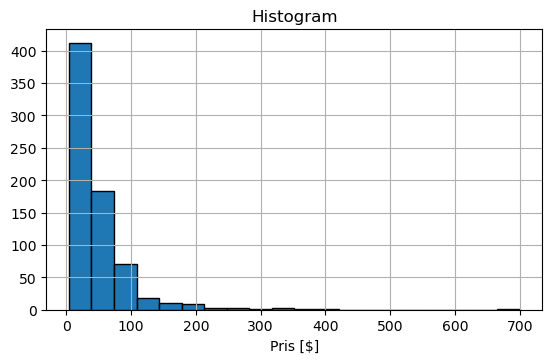

In [6]:
# Plotte histogram

plt.hist(df2['Price'], bins = 20, edgecolor = 'black')
plt.xlabel('Pris [$]')
plt.title('Histogram')
plt.gca().set_aspect(1)
plt.grid()
plt.show()

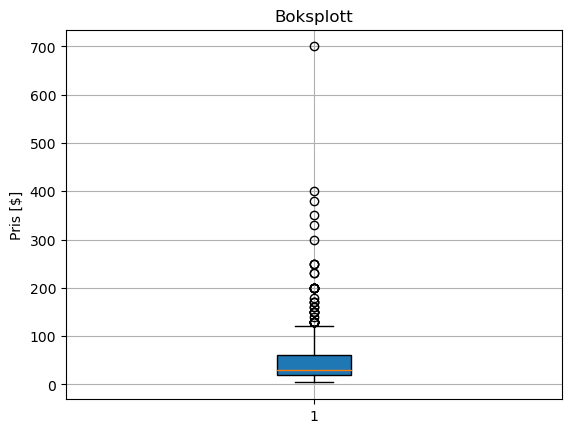

In [7]:
# Plotte boksplott
# Kode hentet fra https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/ den 14.11.2023

plt.boxplot(df2['Price'], patch_artist = True)
plt.ylabel('Pris [$]')
plt.title('Boksplott')
plt.grid()
plt.show()

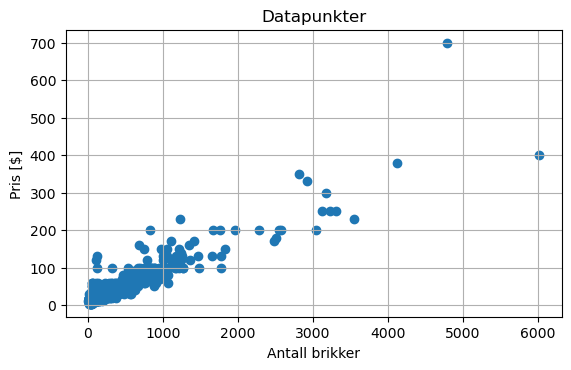

In [8]:
# Plotte datapunkter

plt.scatter(df2['Pieces'], df2['Price'])
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Datapunkter')
plt.gca().set_aspect(5)
plt.grid()
plt.show()

In [9]:
# Finne minimum verdi

minimum = min(df2['Price'])

print(f'Minimum: {minimum}')

Minimum: 3.99


In [10]:
# Finnne maximum verdi

maximum = max(df2['Price'])

print(f'Maximum: {maximum}')

Maximum: 699.99


In [11]:
# Finne gjennomsnitt

gjennomsnitt = np.mean(df2['Price'])

print(f'Gjennomsnitt: {gjennomsnitt}')

Gjennomsnitt: 46.35134453781513


In [12]:
# Finne median

median = np.median(df2['Price'])

print(f'Median: {median}')

Median: 29.99


In [13]:
# Enkel lineær regresjon

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     3802.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          9.01e-288
Time:                        13:30:41   Log-Likelihood:                -3194.2
No. Observations:                 714   AIC:                             6392.
Df Residuals:                     712   BIC:                             6401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2338      0.988     10.363      0.000       8.295      12.173
Pieces         0.0873      0.001     61.664      0.000       0.085       0.090
==============================================================================
Omnibus:                      659.458   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61214.067
Skew:                           3.717   Prob(JB):                         0.00
Kurtosis:                      47.748   Cond. No.                         866.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

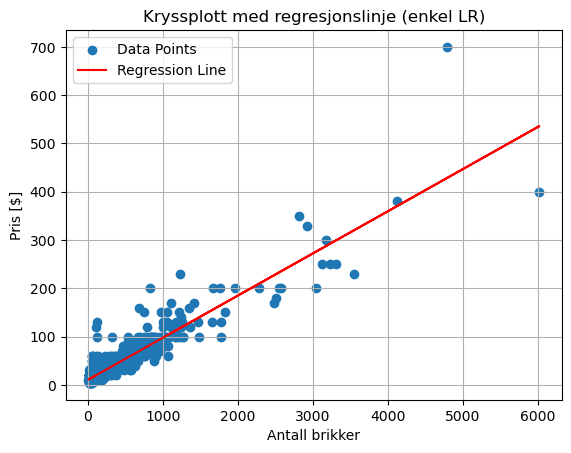

In [14]:
# Plotte enkel regresjonsmodell

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

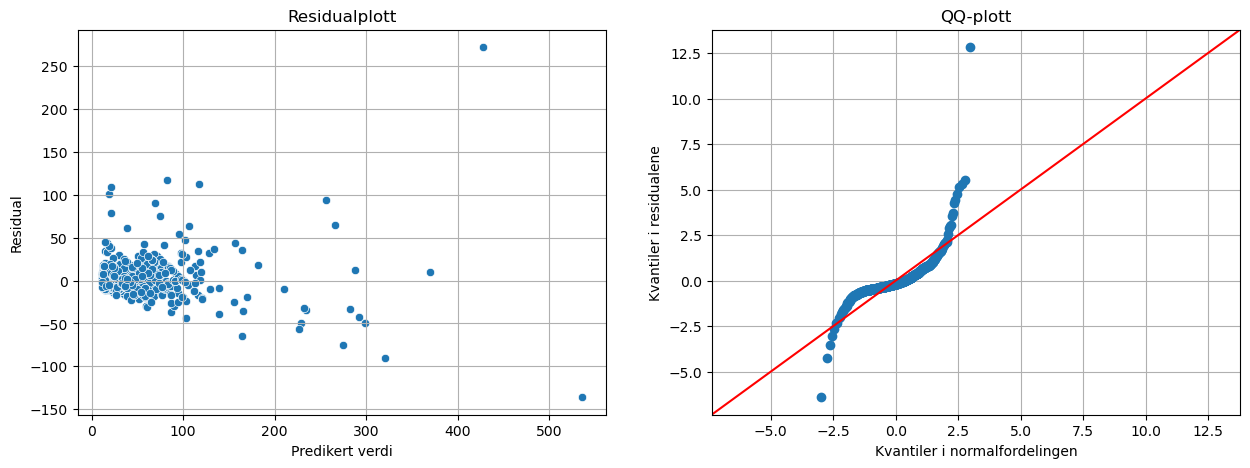

In [15]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel('Predikert verdi')
axis[0].set_ylabel('Residual')
axis[0].set_title('Residualplott')
axis[0].grid()

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel('Kvantiler i normalfordelingen')
axis[1].set_ylabel('Kvantiler i residualene')
axis[1].set_title('QQ-plott')
axis[1].grid()

plt.show()

In [16]:
# Enkel lineær regresjon for vår generasjon

subset_df2 = df2[df2['Generation'].isin(['Our'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1409.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.02e-122
Time:                        13:30:43   Log-Likelihood:                -1578.9
No. Observations:                 338   AIC:                             3162.
Df Residuals:                     336   BIC:                             3169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6714      1.730      6.169      0.000       7.269      14.074
Pieces         0.0924      0.002     37.539      0.000       0.088       0.097
==============================================================================
Omnibus:                      256.214   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14653.009
Skew:                           2.507   Prob(JB):                         0.00
Kurtosis:                      34.864   Cond. No.                         863.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

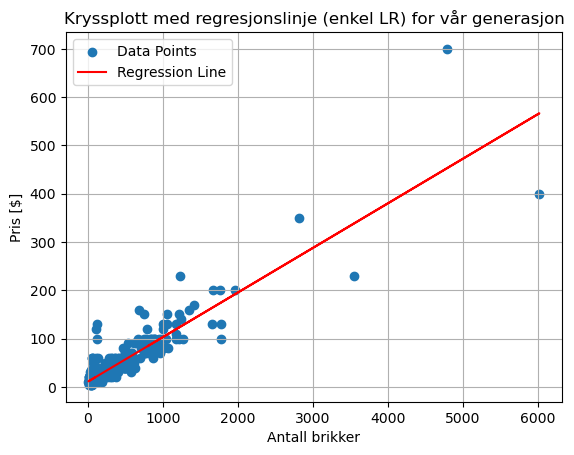

In [17]:
# Plotte enkel regresjonsmodell for vår generasjon

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for vår generasjon')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Enkel lineær regresjon for etter vår generasjon

subset_df2 = df2[df2['Generation'].isin(['After'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     2500.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.38e-131
Time:                        13:30:43   Log-Likelihood:                -957.11
No. Observations:                 249   AIC:                             1918.
Df Residuals:                     247   BIC:                             1925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6099      0.974      6.784      0.000       4.691       8.529
Pieces         0.0906      0.002     49.997      0.000       0.087       0.094
==============================================================================
Omnibus:                      100.295   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.969
Skew:                           1.484   Prob(JB):                    4.71e-129
Kurtosis:                       9.939   Cond. No.                         729.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

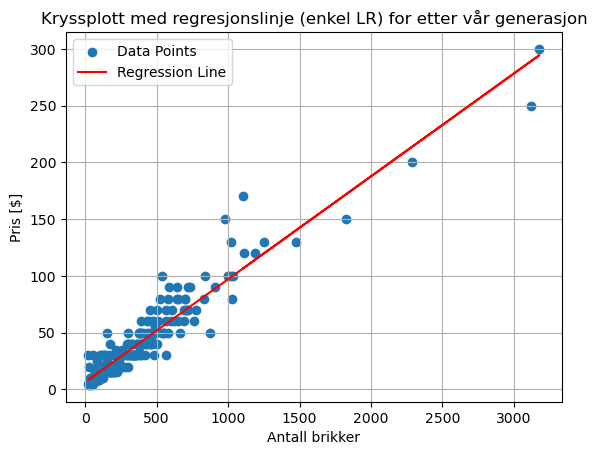

In [19]:
# Plotte enkel regresjonsmodell for etter vår generasjon

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for etter vår generasjon')
plt.legend()
plt.grid()
plt.show()

In [20]:
# Enkel lineær regresjon for usikker

subset_df2 = df2[df2['Generation'].isin(['Unsure'])]

formel = 'Price ~ Pieces'

modell = smf.ols(formel, data = subset_df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1097.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           9.92e-64
Time:                        13:30:44   Log-Likelihood:                -559.71
No. Observations:                 127   AIC:                             1123.
Df Residuals:                     125   BIC:                             1129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4210      2.169      6.189      0.000       9.129      17.713
Pieces         0.0779      0.002     33.117      0.000       0.073       0.083
==============================================================================
Omnibus:                      102.730   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1091.062
Skew:                           2.712   Prob(JB):                    1.20e-237
Kurtosis:                      16.296   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

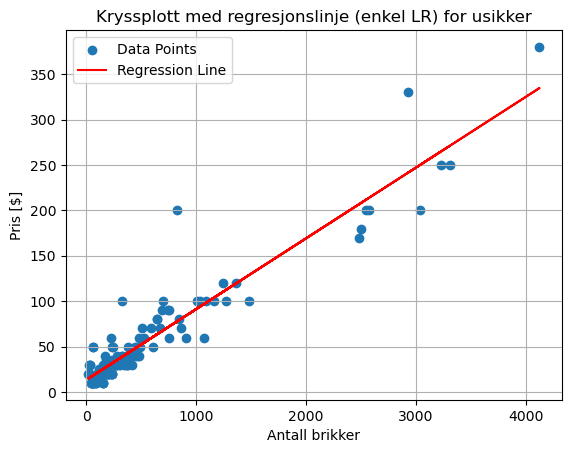

In [21]:
# Plotte enkel regresjonsmodell for usikker

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(subset_df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(subset_df2['Pieces'], subset_df2['Price'], label = 'Data Points')
plt.plot(regression_x, regression_y, color = 'red', label = 'Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR) for usikker')
plt.legend()
plt.grid()
plt.show()

In [22]:
# Definerer gruppene

generations = ['After', 'Our', 'Unsure']

In [23]:
# Multippel lineær regresjon med eget skjæringspunkt for hver gruppe

formel = 'Price ~ Pieces + Generation'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1283.
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          4.07e-286
Time:                        13:30:44   Log-Likelihood:                -3189.7
No. Observations:                 714   AIC:                             6387.
Df Residuals:                     710   BIC:                             6406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.7877      1.435      5.426      0.000       4.970      10.605
Generation[T.Our]        4.9267      1.767      2.789      0.005       1.458       8.395
Generation[T.Unsure]     0.6280      2.317      0.271      0.786      -3.922       5.178
Pieces                   0.0873      0.001     61.642      0.000       0.085       0.090
==============================================================================
Omnibus:                      648.766   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60278.411
Skew:                           3.613   Prob(JB):                         0.00
Kurtosis:                      47.429   Cond. No.                     2.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

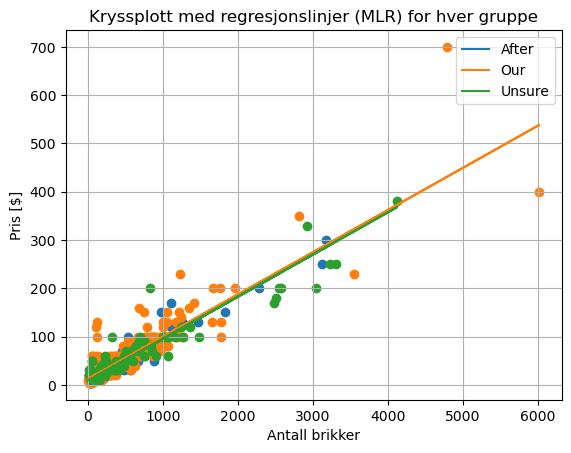

In [24]:
# Plotte multippel regresjonsmodell med eget skjæringspunkt for hver gruppe

intercept = [resultat.params['Generation[T.Unsure]'], resultat.params['Generation[T.Our]'], 0] + resultat.params['Intercept']
slope = resultat.params['Pieces']

for i, generation in enumerate(generations):
    
    regression_x = np.array(df2[df2['Generation'].isin([generation])]['Pieces'])
    regression_y = slope * regression_x + intercept[i]
    
    plt.scatter(df2[df2['Generation'].isin([generation])]['Pieces'], df2[df2['Generation'].isin([generation])]['Price'])
    plt.plot(regression_x, regression_y, label = generation)

plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer (MLR) for hver gruppe')
plt.legend()
plt.grid()
plt.show()

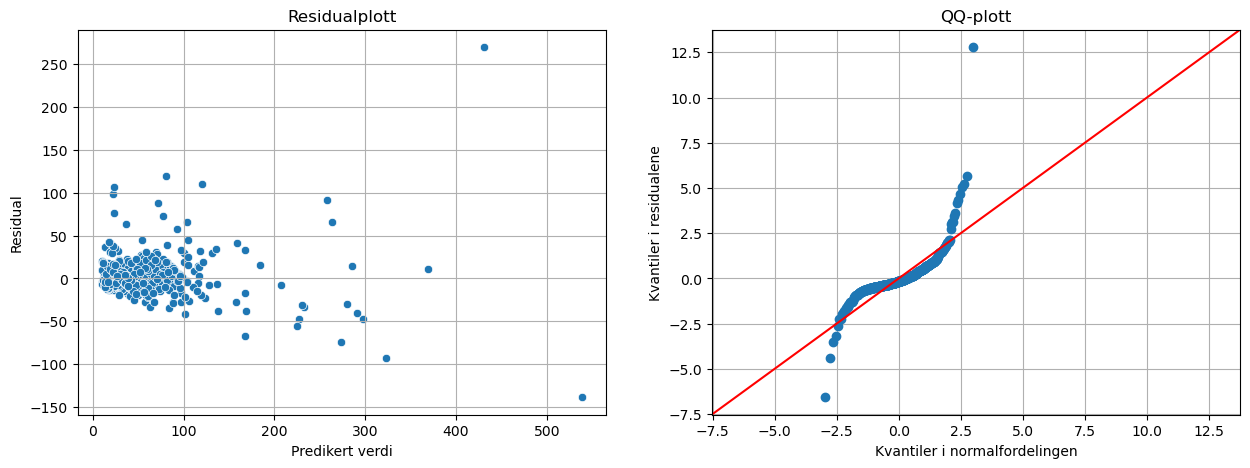

In [25]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel('Predikert verdi')
axis[0].set_ylabel('Residual')
axis[0].set_title('Residualplott')
axis[0].grid()

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel('Kvantiler i normalfordelingen')
axis[1].set_ylabel('Kvantiler i residualene')
axis[1].set_title('QQ-plott')
axis[1].grid()

plt.show()

In [26]:
# Multippel lineær regresjon med eget stigningstall og skjæringspunkt for hver gruppe

formel = 'Price ~ Pieces * Generation'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     796.1
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          9.14e-288
Time:                        13:30:45   Log-Likelihood:                -3178.7
No. Observations:                 714   AIC:                             6369.
Df Residuals:                     708   BIC:                             6397.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.6099      1.790      3.692      0.000       3.095      10.125
Generation[T.Our]               4.0616      2.267      1.791      0.074      -0.390       8.513
Generation[T.Unsure]            6.8112      2.883      2.363      0.018       1.151      12.471
Pieces                          0.0906      0.003     27.212      0.000       0.084       0.097
Pieces:Generation[T.Our]        0.0018      0.004      0.457      0.648      -0.006       0.009
Pieces:Generation[T.Unsure]    -0.0127      0.004     -3.072      0.002      -0.021      -0.005
==============================================================================
Omnibus:                      554.958   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47126.674
Skew:                           2.797   Prob(JB):                         0.00
Kurtosis:                      42.406   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

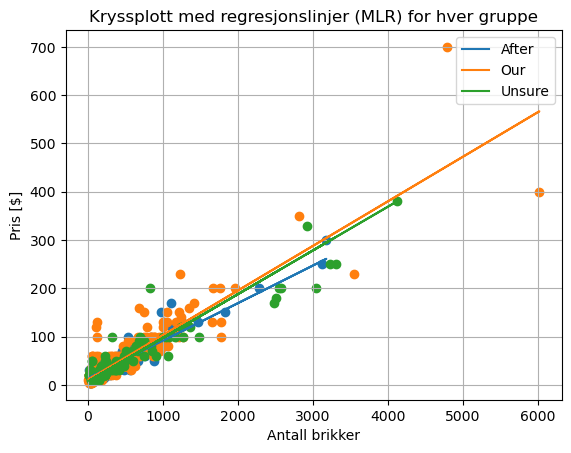

In [27]:
# Plotte multippel regresjonsmodell med eget stigningstall og skjæringspunkt for hver gruppe

intercept = [resultat.params['Generation[T.Unsure]'], resultat.params['Generation[T.Our]'], 0] + resultat.params['Intercept']
slope = [resultat.params['Pieces:Generation[T.Unsure]'], resultat.params['Pieces:Generation[T.Our]'], 0] + resultat.params['Pieces']

for i, generation in enumerate(generations):
    
    regression_x = np.array(df2[df2['Generation'].isin([generation])]['Pieces'])
    regression_y = slope[i] * regression_x + intercept[i]
    
    plt.scatter(df2[df2['Generation'].isin([generation])]['Pieces'], df2[df2['Generation'].isin([generation])]['Price'])
    plt.plot(regression_x, regression_y, label = generation)

plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer (MLR) for hver gruppe')
plt.legend()
plt.grid()
plt.show()

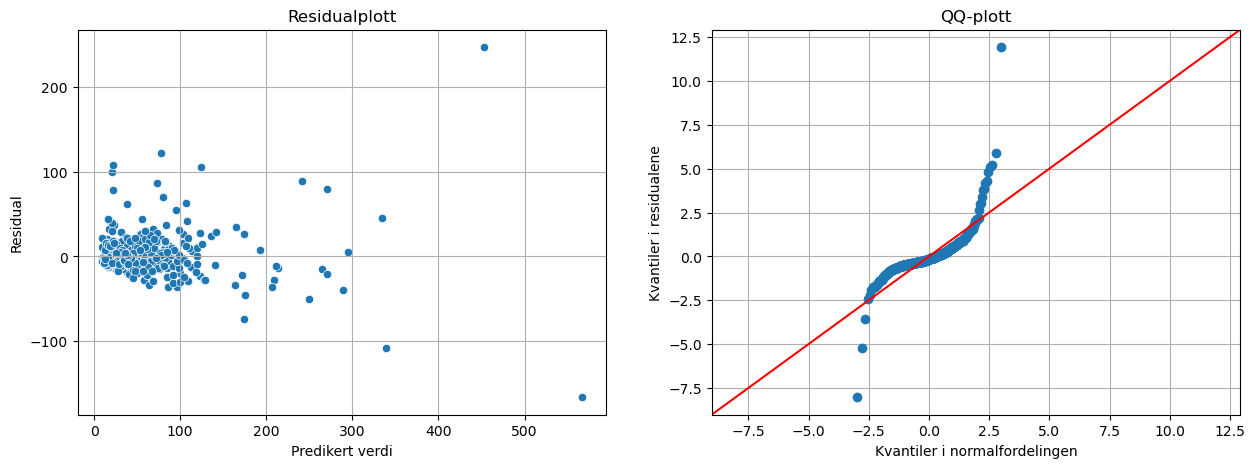

In [28]:
# Plotte predikert verdi mot residual og kvantil-kvantil-plott mot residualene

figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_xlabel('Predikert verdi')
axis[0].set_ylabel('Residual')
axis[0].set_title('Residualplott')
axis[0].grid()

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_xlabel('Kvantiler i normalfordelingen')
axis[1].set_ylabel('Kvantiler i residualene')
axis[1].set_title('QQ-plott')
axis[1].grid()

plt.show()